<a href="https://colab.research.google.com/github/harjotspahwa/the-ai-landscape/blob/main/ICR_Kaggle_Elementary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kagle [ICR](https://www.kaggle.com/competitions/icr-identify-age-related-conditions/overview) competetion EDA

In [1]:
!pip install kaggle
!pip install plotly

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "retroflake"
os.environ['KAGGLE_KEY'] = "3f27adc103abf1334dd7e4eb2bfc219b"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
! kaggle competitions download icr-identify-age-related-conditions

icr-identify-age-related-conditions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip /content/icr-identify-age-related-conditions.zip


Archive:  /content/icr-identify-age-related-conditions.zip
replace greeks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]
error:  invalid response [[n]]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
df = pd.read_csv("/content/train.csv")

In [7]:
drop_cols = ["Id", "EJ", "Class"]

feat_cols = [col for col in df.columns if col not in drop_cols]

In [8]:
# View the first few rows
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [9]:
# Check the dimensions of the DataFrame
print(df.shape)

(617, 58)


In [10]:
# Get summary statistics
print(df.describe())

               AB            AF           AH          AM          AR  \
count  617.000000    617.000000   617.000000  617.000000  617.000000   
mean     0.477149   3502.013221   118.624513   38.968552   10.128242   
std      0.468388   2300.322717   127.838950   69.728226   10.518877   
min      0.081187    192.593280    85.200147    3.177522    8.138688   
25%      0.252107   2197.345480    85.200147   12.270314    8.138688   
50%      0.354659   3120.318960    85.200147   20.533110    8.138688   
75%      0.559763   4361.637390   113.739540   39.139886    8.138688   
max      6.161666  28688.187660  1910.123198  630.518230  178.943634   

               AX          AY          AZ           BC           BD   ...  \
count  617.000000  617.000000  617.000000   617.000000    617.000000  ...   
mean     5.545576    0.060320   10.566447     8.053012   5350.388655  ...   
std      2.551696    0.416817    4.350645    65.166943   3021.326641  ...   
min      0.699861    0.025578    3.396778  

In [11]:
# View data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

### Histograms


Plotting histograms of numerical features helps us understand the data and derive various insights and conclusions about its distribution, central tendency, dispersion, and potential relationships with other features. Here are some of the ways histograms can aid in data exploration and analysis.

**1. Distribution Visualisation:** Histograms provide a visual representation of the distribution of each numerical feature. They show how the data is spread across different values and help identify the shape of the distribution, such as normal, skewed, bimodal, or multimodal.

**2. Central Tendency:** Histograms can help us identify the central tendency of the data. The peak of the histogram (mode) represents the most common value, while the mean and median can be estimated by assessing the symmetry and the location of the central peak.

**3. Outliers Detection:** Outliers are data points that lie far away from the majority of the data. Histograms can give us insights into the presence of outliers by showing values that are isolated from the main distribution.
Data Range and Spread: Histograms allow us to observe the range of data values and the spread or variation of data around the central tendency. The width of the histogram bars provides an indication of the frequency of values within a specific range.

**4. Skewness and Kurtosis:** Skewness refers to the lack of symmetry in the distribution, while kurtosis measures the tailedness or sharpness of the distribution. Histograms can help identify if the data is positively or negatively skewed and if it exhibits high or low kurtosis.

**5. Data Transformation:** Histograms can provide insights into whether data transformation (e.g., log transformation) might be necessary to make the data more suitable for certain analyses or modeling techniques.
Feature Engineering: Histograms can aid in feature engineering by suggesting possible binning strategies or identifying features that might benefit from aggregation or discretization.

**6. Feature Selection:** Understanding the distribution of features can help in the process of feature selection, as we can identify features that show little variation or are highly correlated with other features.

**7. Data Preprocessing:** Histograms can be used to identify data quality issues, such as missing values, anomalies, or data entry errors.

Comparison of Features: By plotting histograms side by side, we can compare the distributions of different features and identify potential patterns or relationships.


Below are the histograms I plotted for each numerical variable from this Kaggle data,

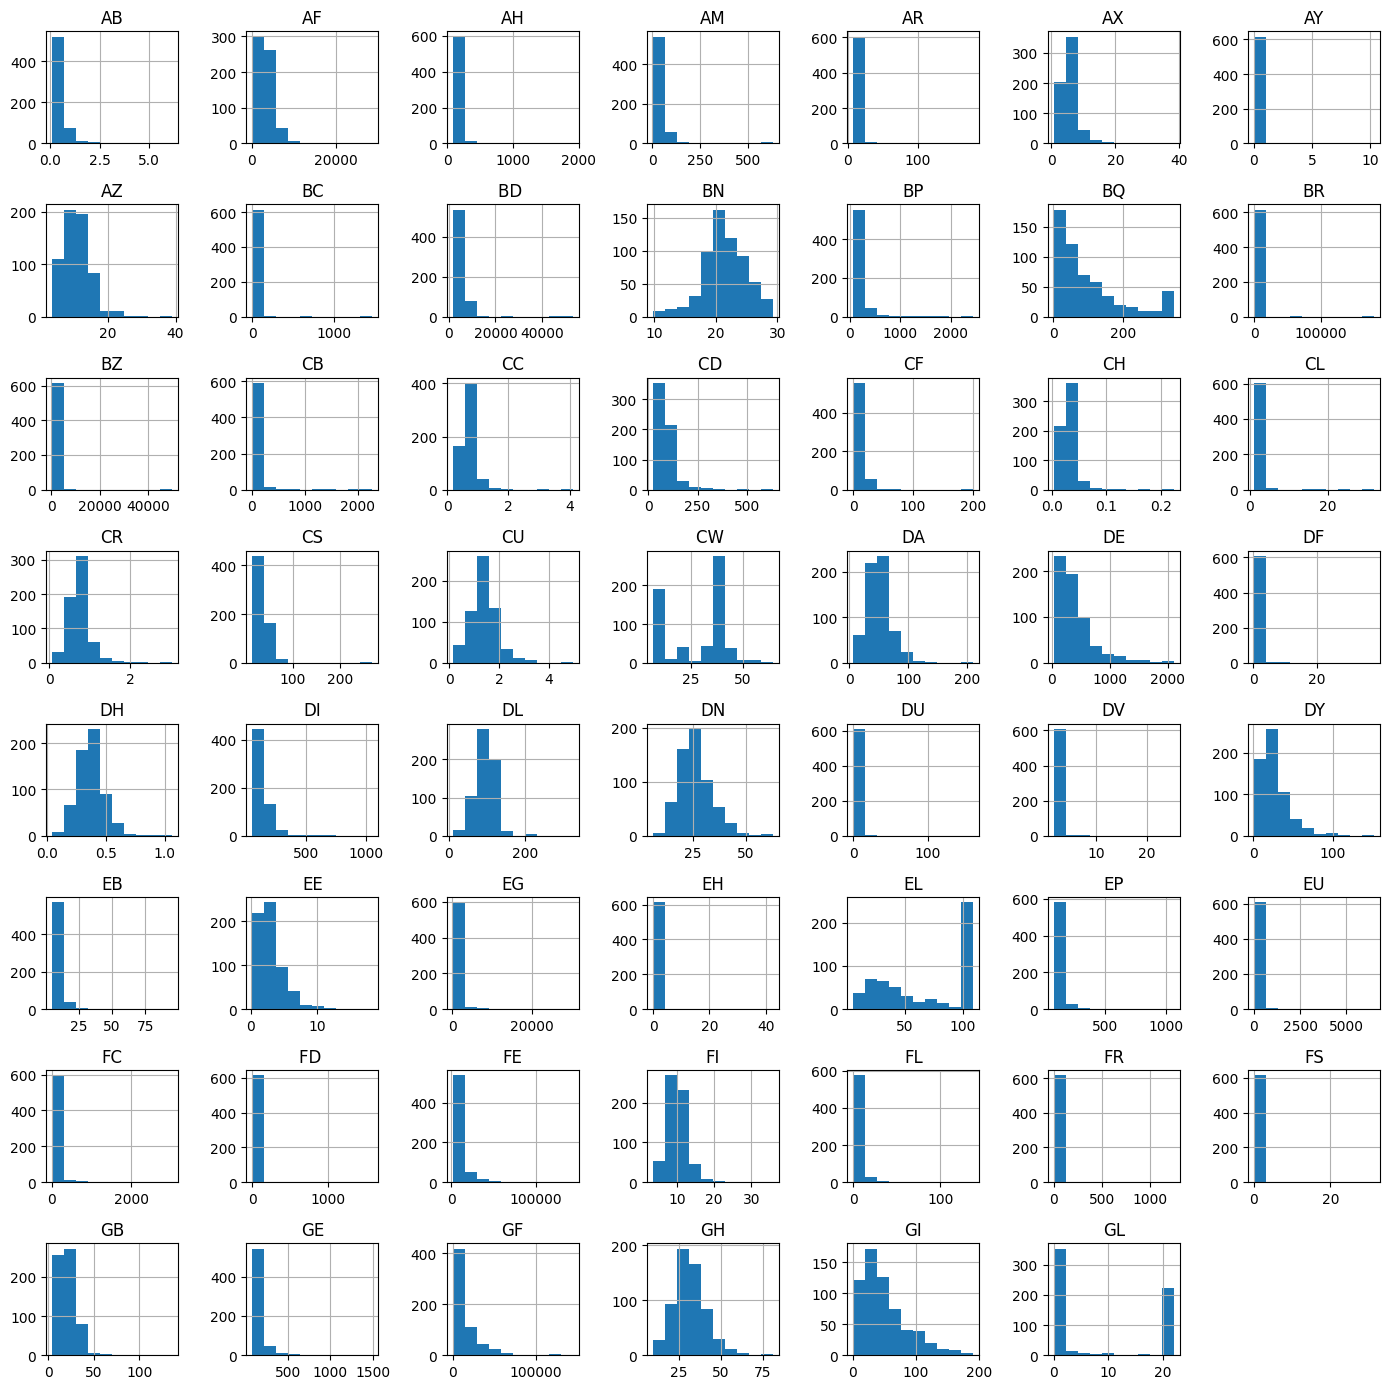

In [12]:
df[feat_cols].hist(figsize=(14, 14))
plt.tight_layout()
plt.show()

Based on the above histograms, let's first highlight some data distributions:

**Normal Distribution:** A normal distribution is characterized by a bell-shaped curve, with a single peak at the mean value, and the frequency of data points decreasing symmetrically as we move away from the mean. A histogram of normally distributed data will show a symmetrical shape.

- In the above plots, we can see a few example such as BN, DH, DN and GH exhibit somewhat close to normal distribution. And looking at DN's and GH's values, it seems like this is an age related data?

**Skewed Distribution:** A skewed distribution indicates an asymmetry in the data. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed). In a positively skewed distribution, the tail extends to the right, while in a negatively skewed distribution, the tail extends to the left. Skewed distributions can provide insights into potential outliers or anomalies in the data.

- A lot of data is left-skewed in nature. If you remember, the data is itself skewed with a 8:2 skew. Does that mean majority classes tend to fall under low end of the spectrum of these histograms?

- To validate this, I took some columns with left skew and saw their means against the Class (target variable) distribution,

In [13]:
df.groupby('Class').agg({'AB':'mean',
                         'BP':'mean',
                         'CB':'mean',
                         'DU':'mean',
                         'EB':'mean',
                         'FS':'mean',
                         'GE':'mean',
                         'Id':'count'})

,AB,BP,CB,DU,EB,FS,GE,Id
Class,,,,,,,,
0,0.416655,218.002592,78.188045,0.716517,8.821558,0.420819,136.411031,509
1,0.762256,294.097149,72.015868,6.912927,10.256322,0.424737,109.582703,108


- Most of the positive/minority 'Class' values are higher than the negative/majority 'Class'.

- Transformations such as logarithmic or square root transformations can help make the data more symmetric and suitable for some modeling techniques.

**Bimodal Distribution:** A bimodal distribution exhibits two distinct peaks, suggesting that the data can be grouped into two separate modes. This may indicate the presence of two different groups or subpopulations within the data.

- Some of that data such as CW and GL follows a Bimodal Distribution.

- This might indicate that the data comes from different sources or different underlying processes.

Multimodal Distribution: A multimodal distribution has more than two peaks, indicating the presence of multiple modes or clusters in the data.

In [14]:
df.Class.value_counts(1)

0    0.824959
1    0.175041
Name: Class, dtype: float64

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# # Initialize the Min-Max Scaler
# scaler = MinMaxScaler(feature_range=(-1,1))
# # Select only the numerical columns to scale (excluding the target variable if present)
# numerical_columns = df[feat_cols]
# # Fit and transform the numerical columns using the Min-Max Scaler
# scaled_data = scaler.fit_transform(numerical_columns)
# # Create a new DataFrame with the scaled data and the original column names
# scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns.columns)

### Box plots

Box plots provide several unique insights that histograms do not fully capture. While both visualizations are useful for understanding the distribution of numerical data, box plots offer additional information and advantages:

**1. Outliers Identification:** Box plots explicitly show individual data points that are considered outliers. Outliers are data points that lie far away from the majority of the data and can significantly affect the mean and standard deviation. In histograms, outliers are not explicitly indicated, and they might be less evident.

**2. Visual Comparison of Distributions:** Box plots are highly effective when comparing the distribution of multiple numerical features or when comparing the same feature across different groups or categories. The compact representation of box plots allows for a quick visual comparison, making it easier to identify differences in central tendency, spread, and the presence of outliers between various groups.

**3. Skewness Visualization:** While histograms can provide insights into the skewness of the data distribution, box plots offer a clear visual representation of the skewness. The asymmetry of the box and whiskers can give an immediate indication of whether the data is positively or negatively skewed.

**4. Concise Summary:** Box plots provide a concise summary of the data distribution, including the median, quartiles, range, and the presence of outliers. This summary can be particularly useful when dealing with large datasets or when presenting information to a broader audience.

**5. Robustness to Bin Size:** Unlike histograms, box plots are not influenced by binning choices, which can affect the interpretation of the data distribution in histograms. Box plots provide a more standardized representation of the data distribution.

**6. Comparing Multiple Groups:** Box plots are ideal for comparing the distribution of a numerical feature across multiple categories or groups in a single plot. They make it easier to spot differences in central tendency, spread, and outliers between the groups.

**7. Handling Unevenly Distributed Data:** Box plots are robust to unevenly distributed data, as they rely on quartiles rather than the frequency of data points in predefined bins. This makes them useful when dealing with data that contains sparse or unevenly distributed values.


Unlike histograms, box plots use summary statistics (quartiles) to represent the data. Scaling the data may affect the quartiles and can alter the appearance of the box plot. If you want to compare the distribution of different features on the same box plot, it is essential to scale the data so that they have a similar range. Below is the box plot I for all the feature varibles after scaling the data.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Select only the numerical columns to scale (excluding the target variable if present)
numerical_columns = df[feat_cols]
# Fit and transform the numerical columns using the Min-Max Scaler
scaled_data = scaler.fit_transform(numerical_columns)
# Create a new DataFrame with the scaled data and the original column names
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns.columns)

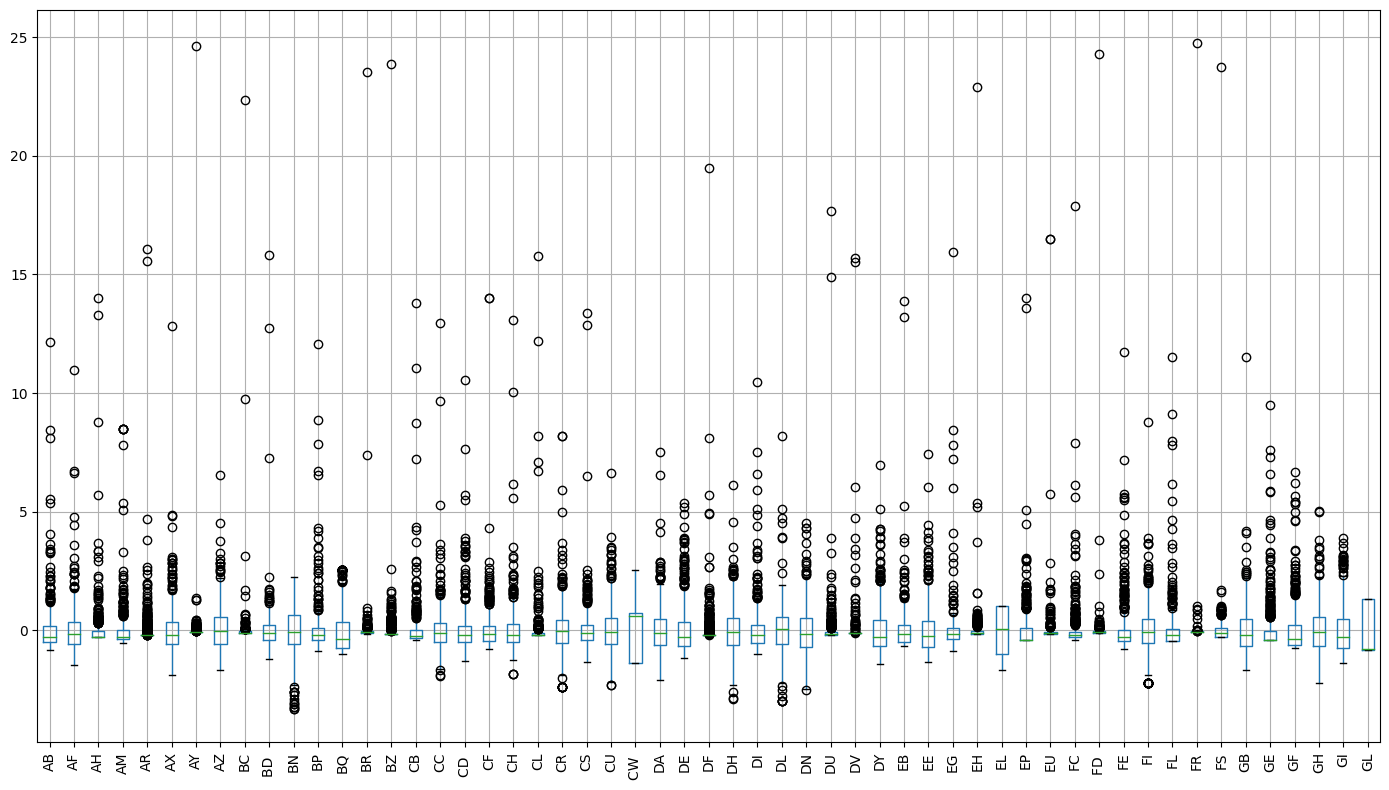

In [17]:
# Create a box plot for each numerical column
scaled_df.boxplot(figsize=(14, 8))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Without looking any further, it's evident that the data is negatively skewed. To validate this, we can plot a reduced-dimension chart to see if there's some distinction between Class 0 & 1 values.

- There are some points in the data far away from 75th percentile, they seem to be outliers but are they?


Let's perform some dimensionality reduction and see if it holds true. For this, we will be using PCA with 3 components.

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=3)
scaled_df = scaled_df.fillna(0)
print(scaled_df.shape)
reduced_data = pca.fit_transform(scaled_df)
print(scaled_df.shape)

(617, 55)
(617, 55)


In [22]:
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
reduced_df.shape

(617, 3)

In [23]:
reduced_df = pd.concat([reduced_df,df['Class']],axis=1)

In [26]:
variance_explained = pca.explained_variance_ratio_

# Calculate the cumulative variance explained by each component
cumulative_variance_explained = np.cumsum(variance_explained)

# Print the variance explained by each component and the cumulative variance
for component, variance, cumulative_variance in zip(range(1, len(variance_explained) + 1), variance_explained, cumulative_variance_explained):
    print(f"Component {component}: Variance Explained = {variance:.4f}, Cumulative Variance Explained = {cumulative_variance:.4f}")

Component 1: Variance Explained = 0.1255, Cumulative Variance Explained = 0.1255
Component 2: Variance Explained = 0.0843, Cumulative Variance Explained = 0.2098
Component 3: Variance Explained = 0.0635, Cumulative Variance Explained = 0.2733


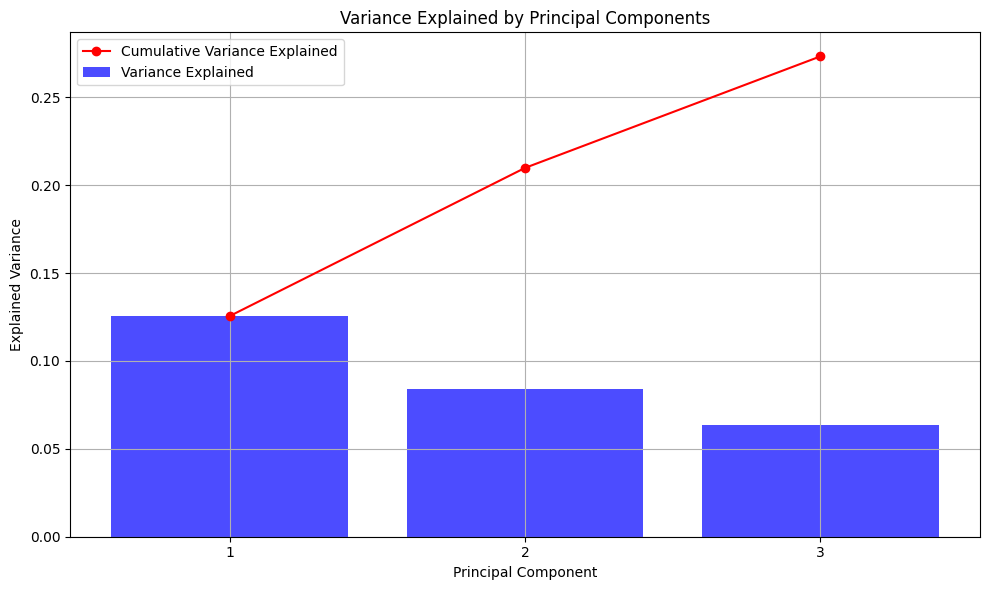

In [27]:
# Plot the variance explained by each component and the cumulative variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, alpha=0.7, label='Variance Explained', color='b')
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='-', color='r', label='Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, len(variance_explained) + 1))
plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px
fig = px.scatter_3d(reduced_df, x='PC1', y='PC2', z='PC3', color = "Class", width=1200, height=800)
fig.show()

Interesting, the yellow values that are far off are likely an indicator of minority class (Class 1). Although, the cumulative variance explained by these 3 reduced features is just 27%, it gives us a good starting point for feature engineering.

In [69]:
# from sklearn.ensemble import IsolationForest
# outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination parameter as per your needs
# outlier_detector.fit(scaled_df)
# outlier_mask = outlier_detector.predict(scaled_df) == 1

In [70]:
# print(scaled_df.shape)
# pruned_df = scaled_df[outlier_mask]
# print(pruned_df.shape)
# pruned_df = pruned_df.reset_index(drop=True)

In [71]:
# pca = PCA(n_components=3)
# pruned_df = pruned_df.fillna(0)
# print(pruned_df.shape)
# reduced_data = pca.fit_transform(pruned_df)
# print(pruned_df.shape)

In [72]:
# reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
# reduced_df.shape

In [73]:
# reduced_df = pd.concat([reduced_df,df['Class']],axis=1)

In [74]:
# fig = px.scatter_3d(reduced_df, x='PC1', y='PC2', z='PC3', color = "Class", width=1200, height=800)
# fig.show()

### Heatmaps

Plotting correlation heatmaps of numerical features helps us understand the data and derive conclusions about the relationships and dependencies between different features. Here's how correlation heatmaps aid in data exploration and analysis:

**1. Identifying Strong Relationships:** Correlation heatmaps display the correlation coefficients between pairs of numerical features. Positive correlation coefficients (close to +1) indicate a direct relationship, while negative correlation coefficients (close to -1) indicate an inverse relationship. Values close to 0 indicate little or no linear relationship. By examining the heatmap, we can quickly identify which features are positively or negatively correlated, helping us understand how they influence each other.

**2. Feature Selection:** Correlation heatmaps can be used to identify highly correlated features. When two or more features are strongly correlated, it suggests that they provide similar information and may not be equally valuable in predictive modeling. In such cases, one of the correlated features can be dropped to reduce redundancy and improve model interpretability.

**3. Data Preprocessing:** High correlations between features can indicate potential multicollinearity issues, which may affect the stability of regression models. Identifying and handling multicollinearity is crucial to ensure accurate and reliable model results.

**4. Pattern Identification:** Correlation heatmaps can reveal patterns or clusters of highly correlated features, which might indicate underlying relationships or dependencies in the data.

**5. Feature Importance:** In predictive modeling, correlation heatmaps can help identify features that are strongly correlated with the target variable. Highly correlated features might have a higher impact on the target variable and can be important predictors in the model.

**6. Data Validation:** Correlation heatmaps can serve as a quick validation check to see if the relationships between features align with prior knowledge or domain expertise. Unexpected high or low correlations might raise questions about data quality or the data generation process.

**7. Data Reduction:** If there are many numerical features, correlation heatmaps can help identify groups of highly correlated features. This insight can guide dimensionality reduction techniques to eliminate less informative features without sacrificing too much information.

Enough talk, let's generate some heat!

In [99]:
import plotly.graph_objects as go

# Assume scaled_df is already defined as the DataFrame with scaled data

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Create a figure using plotly.graph_objects
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',  # You can choose a different colorscale for the heatmap
))

# Set the axis labels
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Features',
)

# Update the hover text to show the correlation coefficient
hover_text = []
for i in range(len(correlation_matrix.index)):
    hover_text.append(['{:.2f}'.format(val) for val in correlation_matrix.iloc[i]])

# fig.update_traces(hovertext=hover_text, hoverinfo='text')

# Update the hovertemplate to include x and y axis labels upon hovering
fig.update_traces(hovertemplate='Feature %{y} vs. Feature %{x}<br>Correlation: %{hovertext}', hovertext=hover_text, hoverinfo='text')


# Show the interactive plot
fig.show()


From the above plot, we need to watch out for extreme positive and negative values. Since the chart is mostly red in colour, it means that it has a lot more positive correlations than negative ones. For example the correlation between CL and DV is 0.95, which means they are highly correlated, which means they provide similar information and may not be equally valuable in predictive modeling. We can use this information to prune some features and reduce data.

# Meet Me

Hello there! 👋 I'm Harjot, a Data Scientist and AI/ML Engineer with a passion for exploring the world of data science, machine learning, and artificial intelligence.

## Connect with Me

- [**My Website**](https://bento.me/harjotpahwa)
- [**LinkedIn**](https://www.linkedin.com/in/harjot-pahwa-492375154/)
- [**Kaggle**](https://www.kaggle.com/retroflake)
- [**Medium**](https://medium.com/@harjotspahwa)

Feel free to reach out to me for any exciting data-related discussions, collaborations, or projects. I'm always eager to learn and grow together with the data science community! Let's connect and stay in touch! 🚀
